# Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import duckdb as db

In [4]:
df=pd.read_parquet("../data/cleaned/dataset.parquet")
df['index'] = df.index

In [5]:
df.dtypes

market_id                                    float64
created_at                            datetime64[us]
actual_delivery_time                  datetime64[us]
store_id                                      object
store_primary_category                        object
order_protocol                                  int8
total_items                                    int64
subtotal                                       int64
num_distinct_items                             int64
min_item_price                               float64
max_item_price                               float64
total_onshift_partners                       float64
total_busy_partners                          float64
total_outstanding_orders                     float64
created_at_year                                int32
created_at_month                                int8
created_at_day                                  int8
created_at_hour                                 int8
created_at_minute                             

In [6]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,actual_delivery_time_day_of_week,created_at_day_name,actual_delivery_time_day_name,created_at_week_number,actual_delivery_time_week_number,created_at_week_of_month,actual_delivery_time_week_of_month,delivery_time_seconds,delivery_time_minutes,index
0,1.0,2015-02-06 16:54:17,2015-02-06 17:57:16,df263d996281d984952c07998dc54358,american,1,4,3441,4,557.0,...,5,Fri,Fri,6,6,1,1,3779,62,0
1,2.0,2015-02-10 16:19:25,2015-02-10 17:26:29,f0ade77b43923b38237db569b016ba25,mexican,2,1,1900,1,1400.0,...,2,Tue,Tue,7,7,2,2,4024,67,1
2,3.0,2015-01-22 15:09:28,2015-01-22 15:39:09,f0ade77b43923b38237db569b016ba25,other,1,1,1900,1,1900.0,...,4,Thu,Thu,4,4,4,4,1781,29,2
3,3.0,2015-02-03 15:51:45,2015-02-03 16:43:00,f0ade77b43923b38237db569b016ba25,other,1,6,6900,5,600.0,...,2,Tue,Tue,6,6,1,1,3075,51,3
4,3.0,2015-02-14 21:10:36,2015-02-14 21:50:26,f0ade77b43923b38237db569b016ba25,other,1,3,3900,3,1100.0,...,6,Sat,Sat,7,7,2,2,2390,39,4


In [47]:
df.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,...,actual_delivery_time_minute,actual_delivery_time_second,created_at_day_of_week,actual_delivery_time_day_of_week,created_at_week_number,actual_delivery_time_week_number,created_at_week_of_month,actual_delivery_time_week_of_month,delivery_time_seconds,delivery_time_minutes
count,177544.000000,177544,177544,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000,...,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000,177544.000000
mean,2.767601,2015-02-04 14:02:31.056284,2015-02-04 14:50:05.157701,2.897192,3.205588,2701.713919,2.675618,692.093454,1164.986471,45.719624,...,29.461959,29.437655,4.224947,4.226158,5.797830,5.802967,4.954789,4.962071,2854.101417,47.076218
min,1.000000,2015-01-21 09:52:03,2015-01-21 10:28:11,1.000000,1.000000,0.000000,1.000000,1.000000,52.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000,3.000000,3.000000,101.000000,1.000000
25%,2.000000,2015-01-28 20:10:10.750000,2015-01-28 20:56:42.750000,1.000000,2.000000,1420.000000,2.000000,300.000000,799.000000,18.000000,...,15.000000,14.000000,3.000000,3.000000,5.000000,5.000000,4.000000,4.000000,2101.000000,35.000000
50%,2.000000,2015-02-04 20:58:15.500000,2015-02-04 21:58:34.500000,3.000000,3.000000,2228.000000,2.000000,599.000000,1095.000000,38.000000,...,30.000000,29.000000,4.000000,4.000000,6.000000,6.000000,5.000000,5.000000,2655.000000,44.000000
75%,4.000000,2015-02-11 19:19:06.250000,2015-02-11 19:59:20.250000,4.000000,4.000000,3421.000000,3.000000,943.000000,1397.000000,66.000000,...,44.000000,44.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,3371.000000,56.000000
max,6.000000,2015-02-18 00:30:44,2015-02-19 17:15:31,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,...,59.000000,59.000000,7.000000,7.000000,8.000000,8.000000,7.000000,7.000000,332482.000000,5541.000000
std,1.329823,NaN,NaN,1.511135,2.674640,1829.211488,1.624410,516.496735,559.219301,34.271843,...,17.302246,17.306359,1.981749,1.989182,1.188666,1.189741,1.223957,1.225219,1394.210402,23.238115


# Univariate Analysis

In [78]:
print(f"There are {df.shape[0]} rows in the dataset")
print(f"First orders were placed on {df['created_at'].min()} and last orders were placed on {df['created_at'].max()}")
# print number of days
print(f"There are {df['created_at'].dt.date.nunique()} unique days in the dataset")

There are 177544 rows in the dataset
First orders were placed on 2015-01-21 09:52:03 and last orders were placed on 2015-02-18 00:30:44
There are 29 unique days in the dataset


**Market ID**

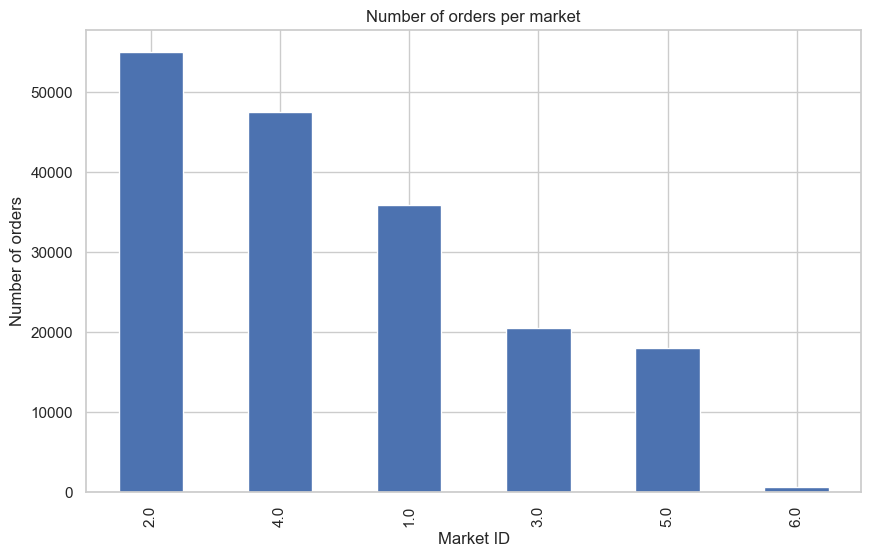

In [26]:
plt.figure(figsize=(10, 6))
df["market_id"].value_counts().plot(kind="bar", title="Number of orders per market");
plt.xlabel("Market ID")
plt.ylabel("Number of orders")
plt.show();

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- Majority of the orders are from market id 2
- Market id 6 has the least number of orders

**Order Protocol**

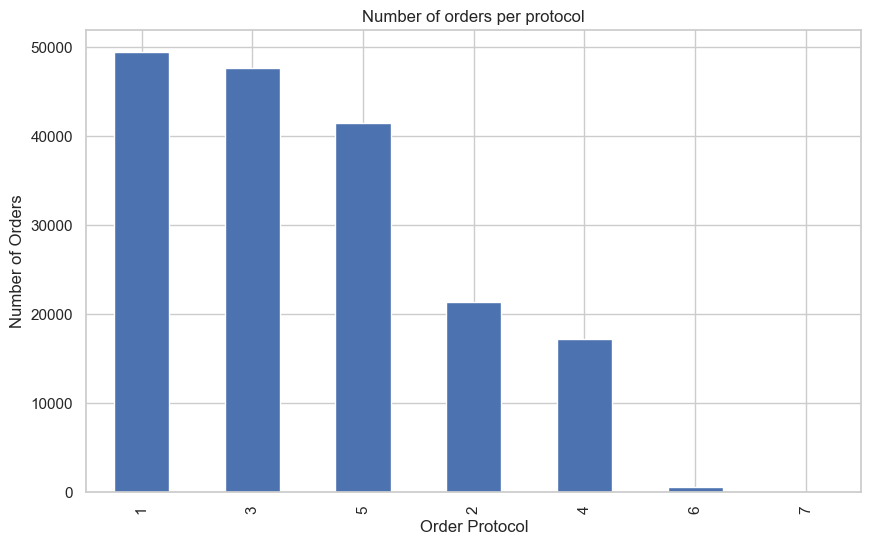

In [27]:
plt.figure(figsize=(10, 6))
df["order_protocol"].value_counts().plot(kind="bar", title="Number of orders per protocol");
plt.xlabel("Order Protocol")
plt.ylabel("Number of Orders");

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- Majority of the orders are from Order Protocol 1
- Order Protocol 7 has the least number of orders

**Total Items**

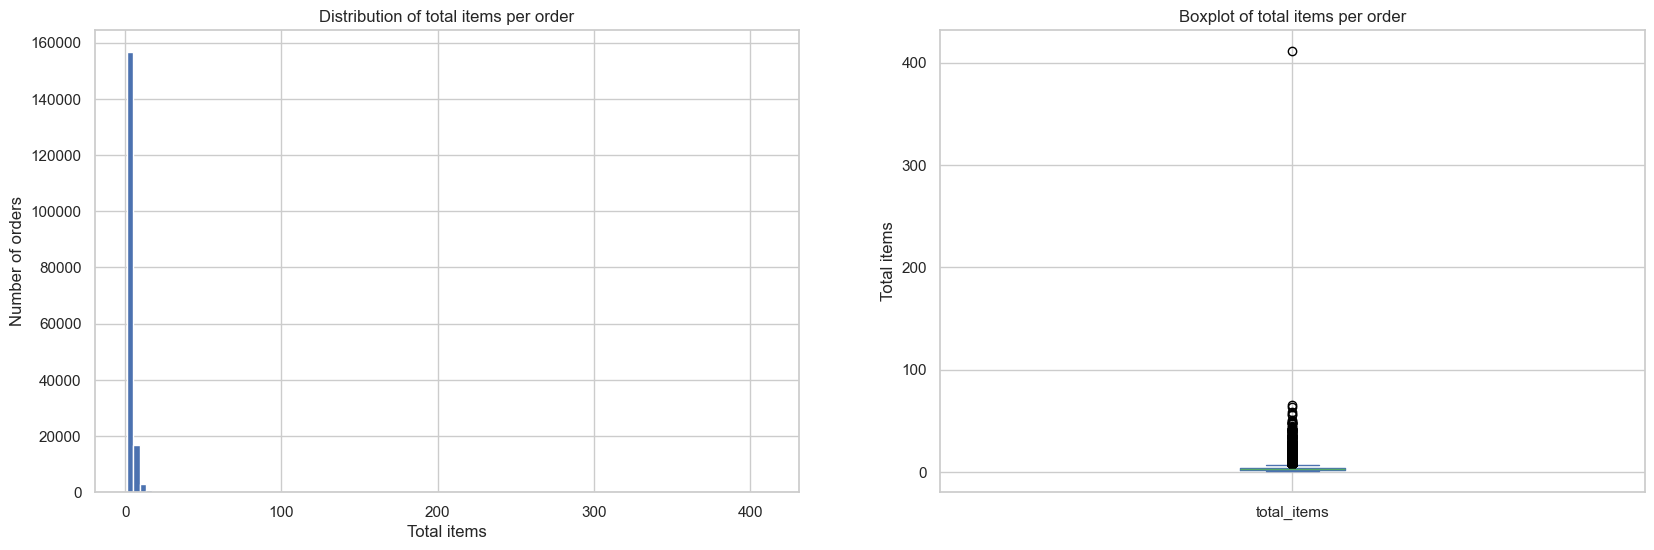

In [31]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

df["total_items"].hist(bins=100, ax=ax[0])
ax[0].set_title("Distribution of total items per order")
ax[0].set_xlabel("Total items")
ax[0].set_ylabel("Number of orders")
df["total_items"].plot(kind="box", ax=ax[1])
ax[1].set_title("Boxplot of total items per order")
ax[1].set_ylabel("Total items")
plt.show();

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- We can see that there is an outlier in the data

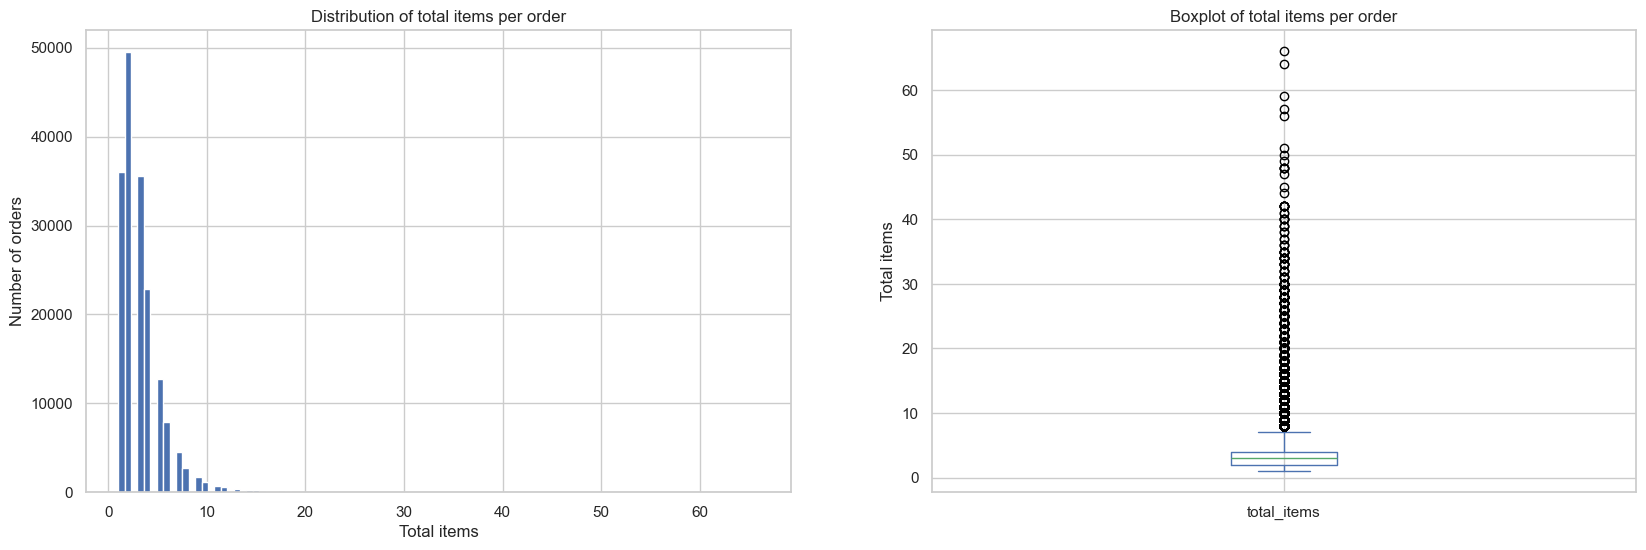

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
_=df[df["total_items"]<100]
_["total_items"].hist(bins=100, ax=ax[0])
ax[0].set_title("Distribution of total items per order")
ax[0].set_xlabel("Total items")
ax[0].set_ylabel("Number of orders")
_["total_items"].plot(kind="box", ax=ax[1])
ax[1].set_title("Boxplot of total items per order")
ax[1].set_ylabel("Total items")
plt.show();

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>


**Sub Total**

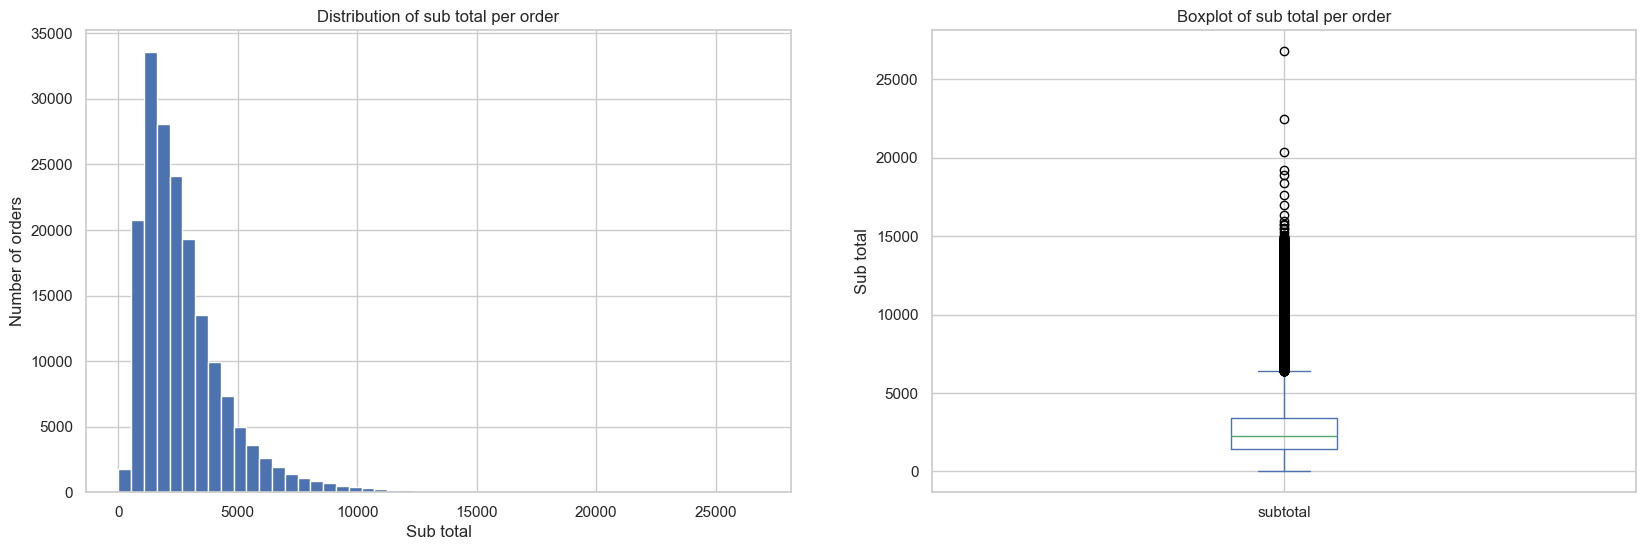

In [6]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

df["subtotal"].hist(bins=50, ax=ax[0])
ax[0].set_title("Distribution of sub total per order")
ax[0].set_xlabel("Sub total")
ax[0].set_ylabel("Number of orders")
df["subtotal"].plot(kind="box", ax=ax[1])
ax[1].set_title("Boxplot of sub total per order")
ax[1].set_ylabel("Sub total")
plt.show();

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>


**Min Price and Max Price**

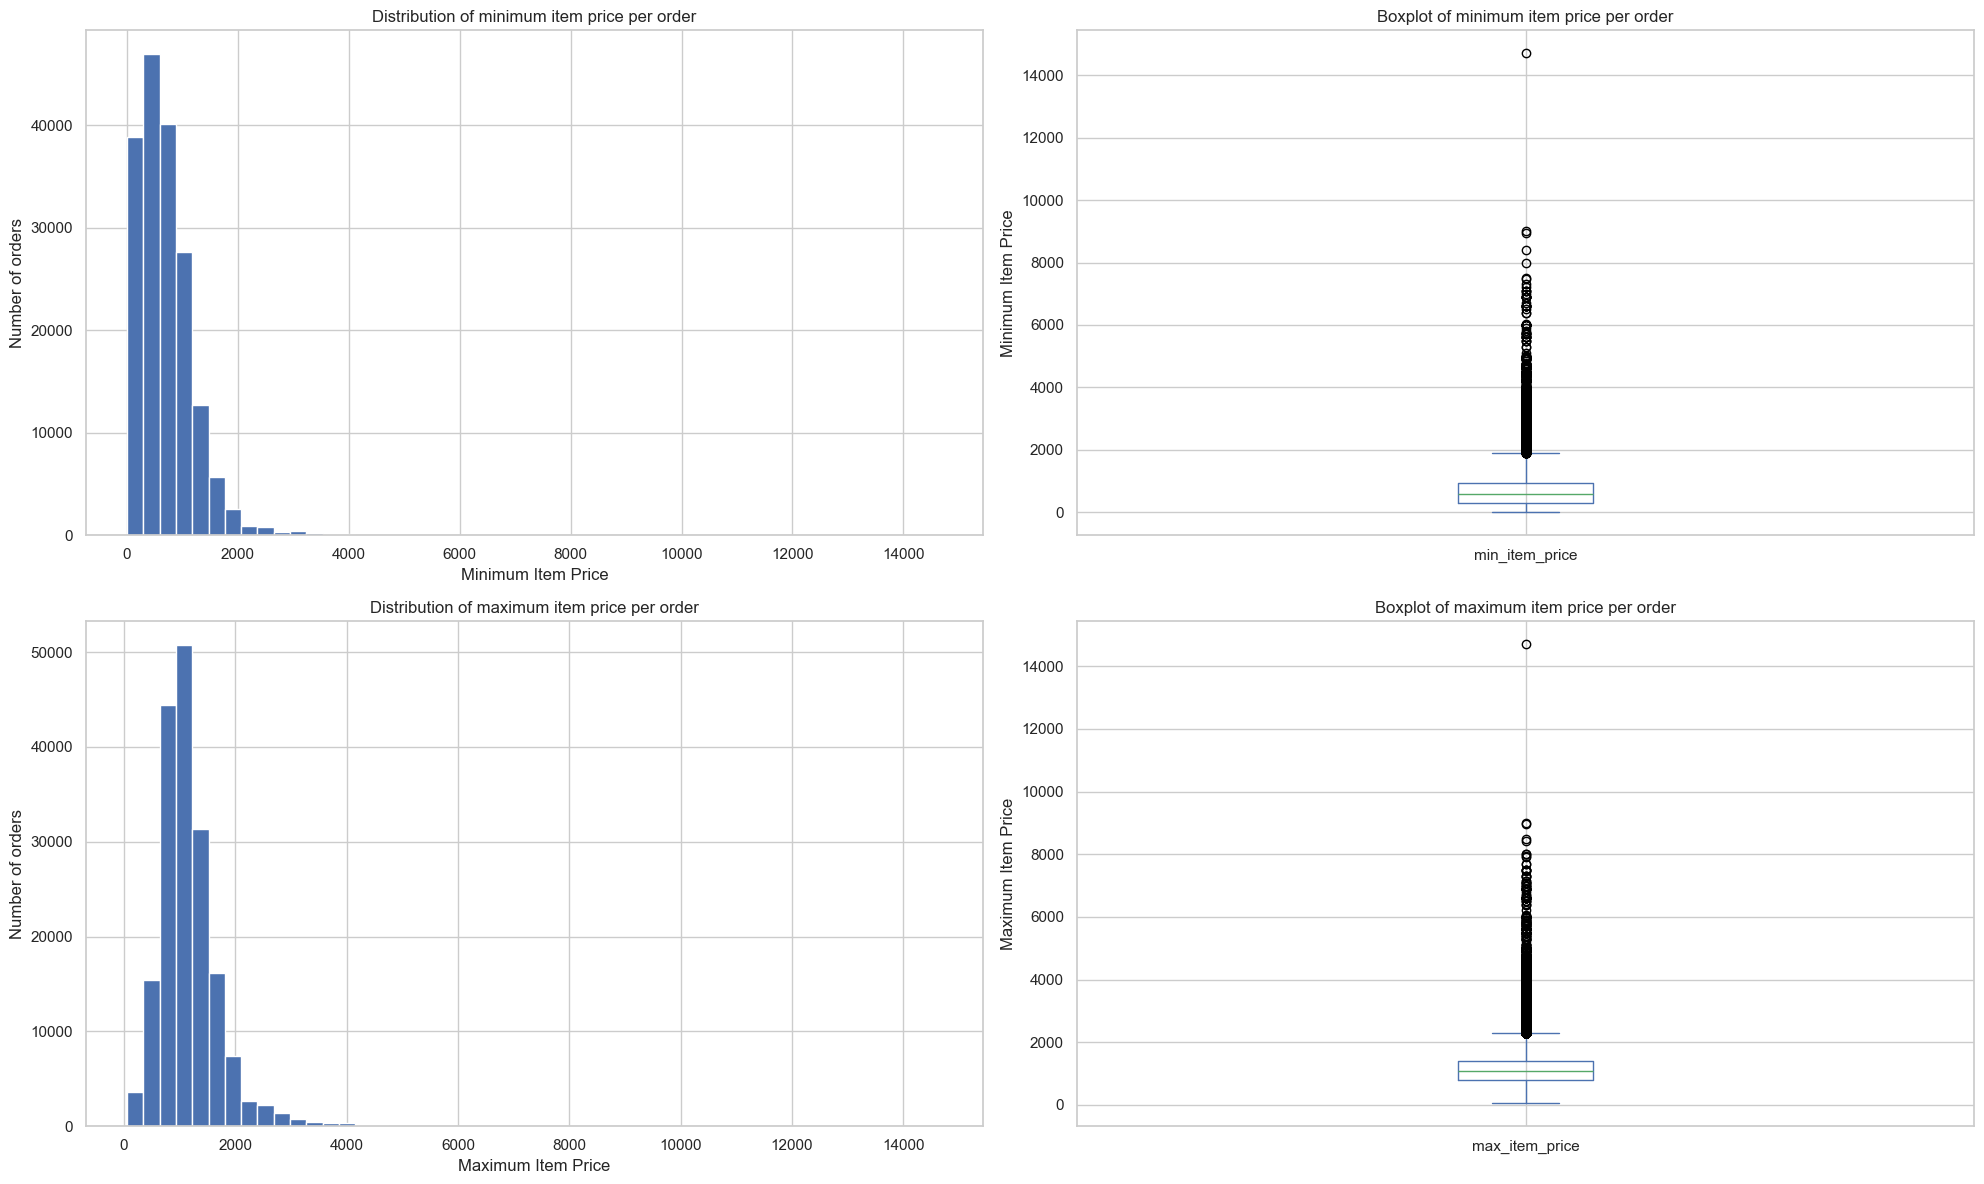

In [5]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))

df["min_item_price"].hist(bins=50, ax=ax[0][0])
ax[0][0].set_title("Distribution of minimum item price per order")
ax[0][0].set_xlabel("Minimum Item Price")
ax[0][0].set_ylabel("Number of orders")

df["min_item_price"].plot(kind="box", ax=ax[0][1])
ax[0][1].set_title("Boxplot of minimum item price per order")
ax[0][1].set_ylabel("Minimum Item Price")


# max_item_price
df["max_item_price"].hist(bins=50, ax=ax[1][0])
ax[1][0].set_title("Distribution of maximum item price per order")
ax[1][0].set_xlabel("Maximum Item Price")
ax[1][0].set_ylabel("Number of orders")
df["max_item_price"].plot(kind="box", ax=ax[1][1])
ax[1][1].set_title("Boxplot of maximum item price per order")
ax[1][1].set_ylabel("Maximum Item Price")


plt.tight_layout()
plt.show();

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>


**Distinct items**

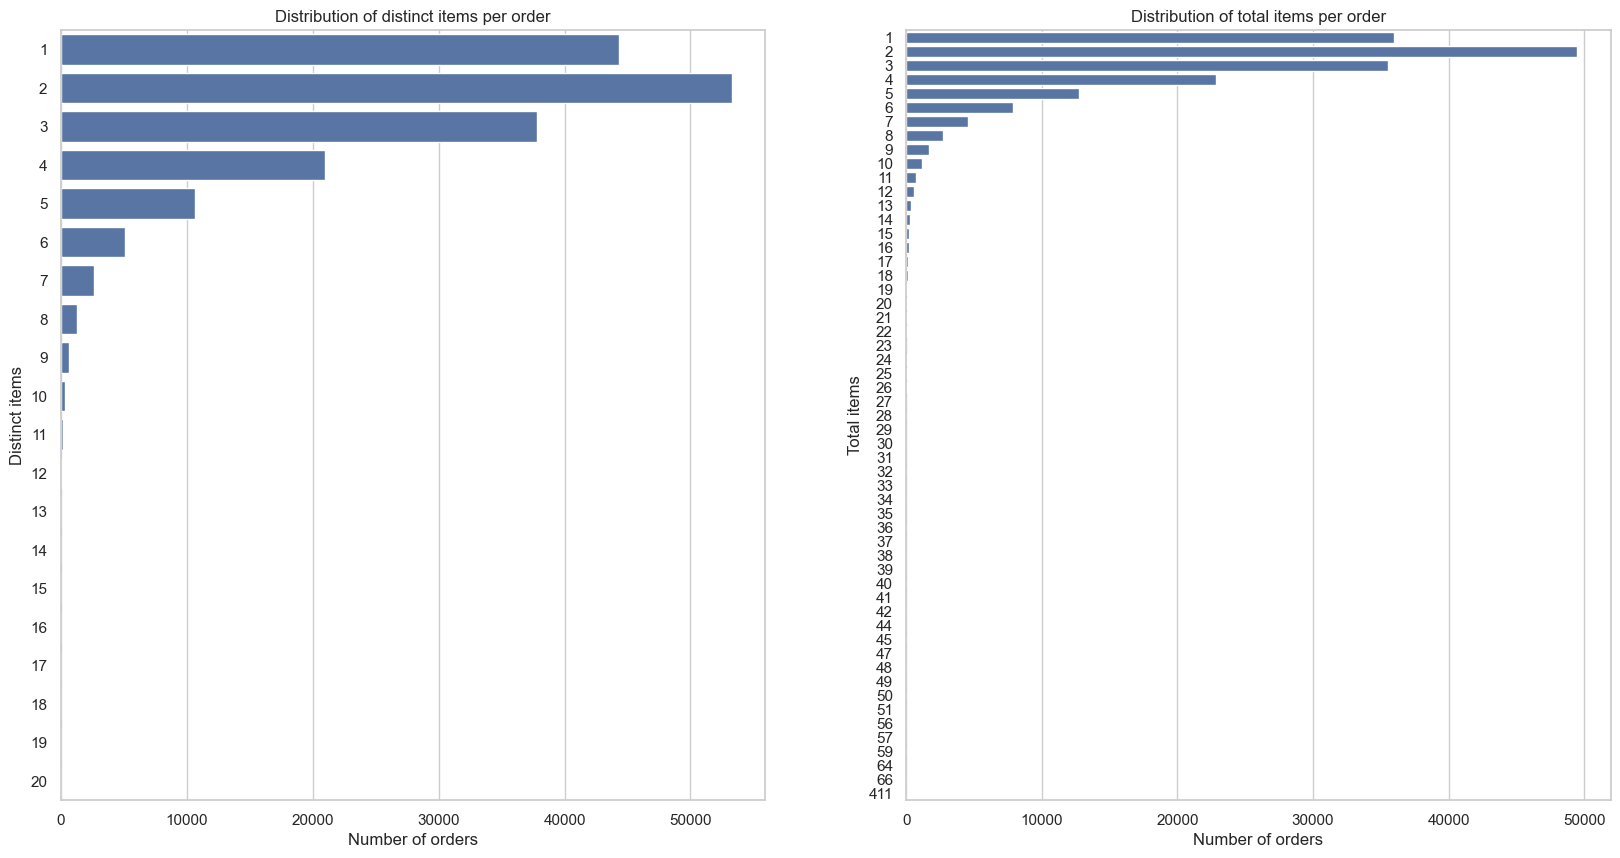

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(data=df, y="num_distinct_items", ax=ax[0])
ax[0].set_title("Distribution of distinct items per order")
ax[0].set_ylabel("Distinct items")
ax[0].set_xlabel("Number of orders")

sns.countplot(data=df, y="total_items", ax=ax[1])
ax[1].set_title("Distribution of total items per order")
ax[1].set_ylabel("Total items")
ax[1].set_xlabel("Number of orders");

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>


**total_onshift_partners total_busy_partners**

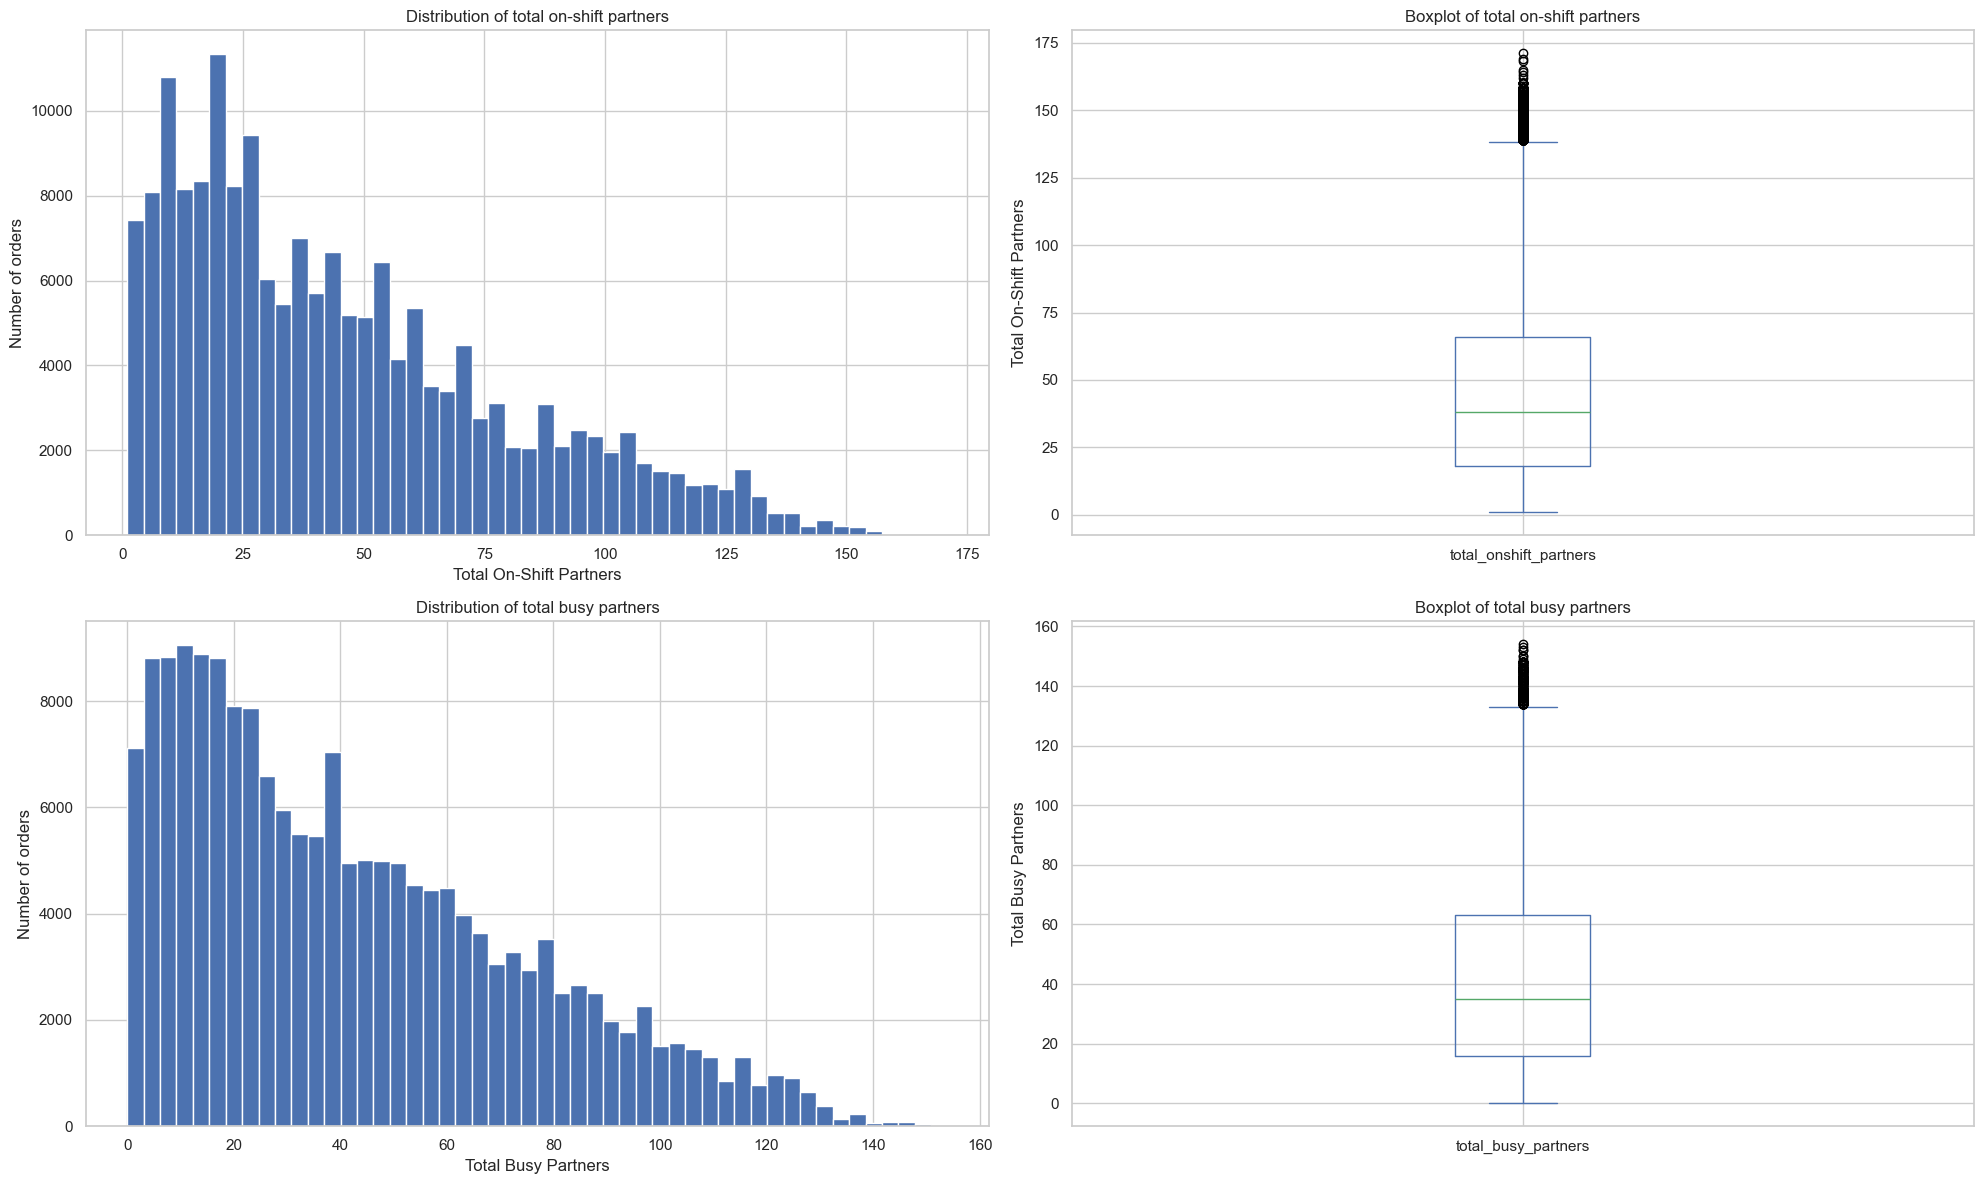

In [4]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))

df["total_onshift_partners"].hist(bins=50, ax=ax[0][0])
ax[0][0].set_title("Distribution of total on-shift partners")
ax[0][0].set_xlabel("Total On-Shift Partners")
ax[0][0].set_ylabel("Number of orders")

df["total_onshift_partners"].plot(kind="box", ax=ax[0][1])
ax[0][1].set_title("Boxplot of total on-shift partners")
ax[0][1].set_ylabel("Total On-Shift Partners")


# total_busy_partners
df["total_busy_partners"].hist(bins=50, ax=ax[1][0])
ax[1][0].set_title("Distribution of total busy partners")
ax[1][0].set_xlabel("Total Busy Partners")
ax[1][0].set_ylabel("Number of orders")
df["total_busy_partners"].plot(kind="box", ax=ax[1][1])
ax[1][1].set_title("Boxplot of total busy partners")
ax[1][1].set_ylabel("Total Busy Partners")


plt.tight_layout()
plt.show();

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>


**total_outstanding_orders**

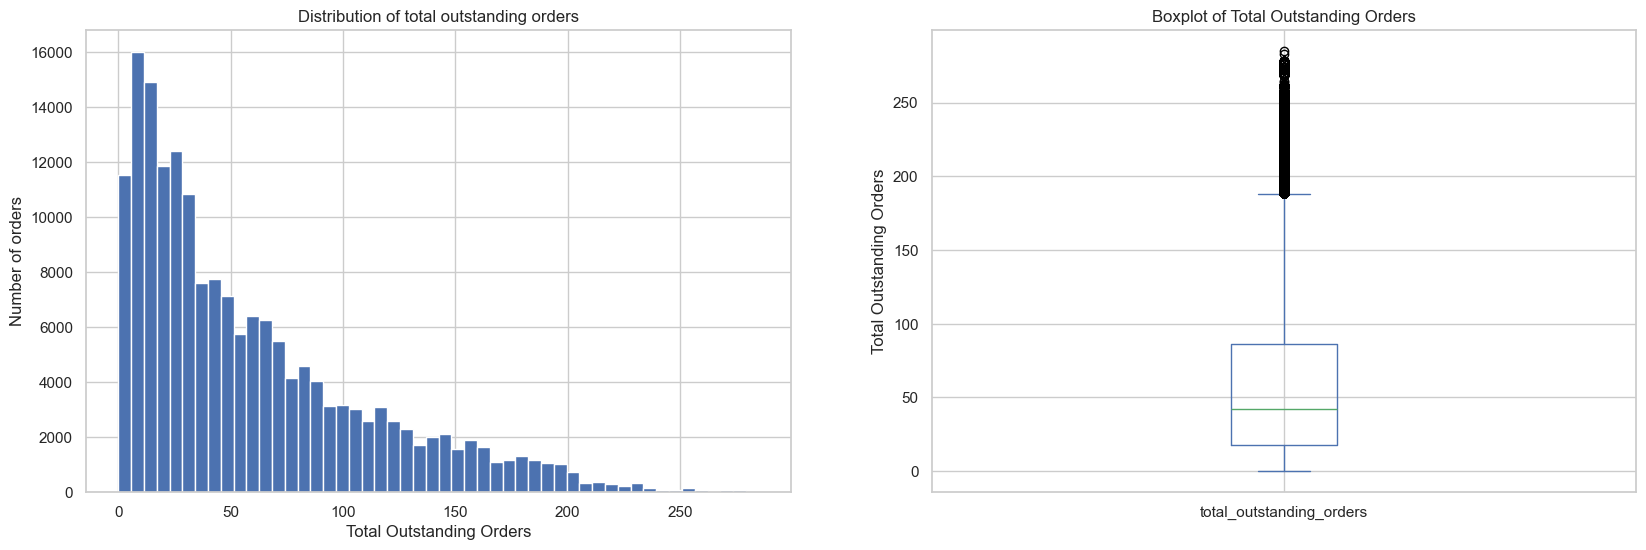

In [9]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

df["total_outstanding_orders"].hist(bins=50, ax=ax[0])
ax[0].set_title("Distribution of total outstanding orders")
ax[0].set_xlabel("Total Outstanding Orders")
ax[0].set_ylabel("Number of orders")
df["total_outstanding_orders"].plot(kind="box", ax=ax[1])
ax[1].set_title("Boxplot of Total Outstanding Orders")
ax[1].set_ylabel("Total Outstanding Orders")
plt.show();

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>


**Order Created Hour**

In [96]:
full_hours = pd.DataFrame({'hour': range(0, 24)})

In [97]:
full_hours=full_hours.copy().join(
    df.groupby("created_at_hour").agg({"order_protocol": "size"}).rename(columns={"order_protocol": "total_orders"}),
    on="hour",
    how="left"
).fillna(0).set_index("hour")

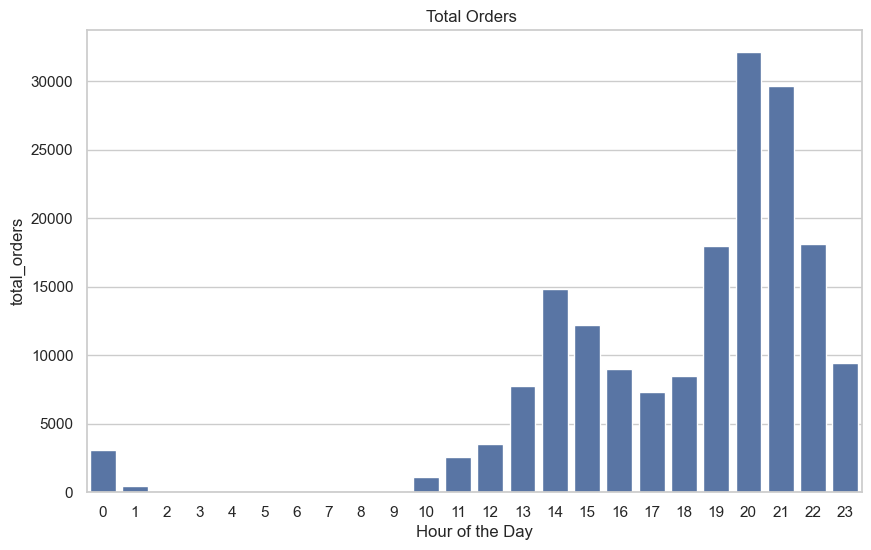

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(data=full_hours, x="hour", y="total_orders");
plt.title("Total Orders ")
plt.xlabel("Hour of the Day");

In [99]:
orders_per_hour_df = db.sql(""" 
select created_at_hour as hour, round(count(*)/((date_diff('day', min(created_at), max(created_at))+1)*24),2) as orders_per_hour
from df
group by created_at_hour
order by created_at_hour
""").to_df()

result_df = full_hours.copy().merge(orders_per_hour_df, on='hour', how='left').fillna(0)
result_df

,hour,total_orders,orders_per_hour
0,0,3087.0,4.59
1,1,455.0,0.79
2,2,0.0,0.00
3,3,0.0,0.00
4,4,0.0,0.00
5,5,0.0,0.00
6,6,0.0,0.00
7,7,0.0,0.00
8,8,0.0,0.00
9,9,104.0,0.15


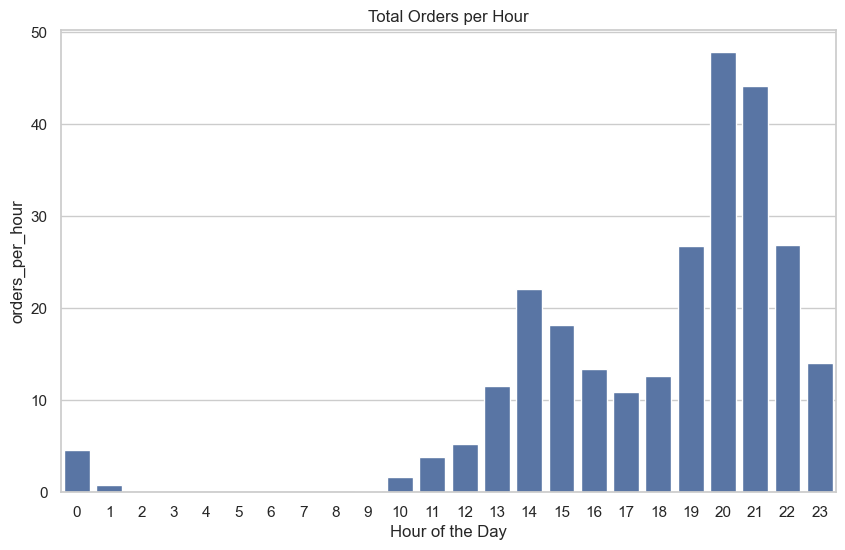

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df, x="hour", y="orders_per_hour");
plt.title("Total Orders per Hour")
plt.xlabel("Hour of the Day");

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>

**Order Created Week**

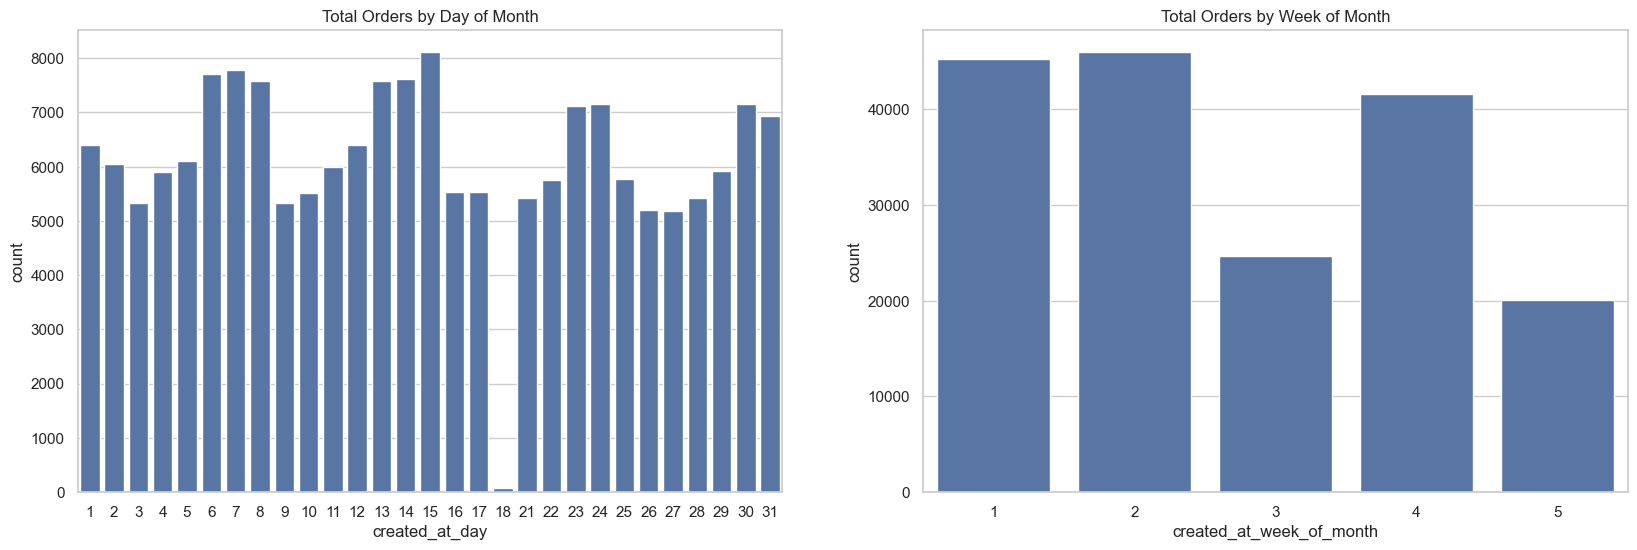

In [9]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

sns.countplot(data=df, x="created_at_day", ax=ax[0]);
ax[0].set_title("Total Orders by Day of Month");

sns.countplot(data=df, x="created_at_week_of_month", ax=ax[1]);
ax[1].set_title("Total Orders by Week of Month");
plt.show();

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>


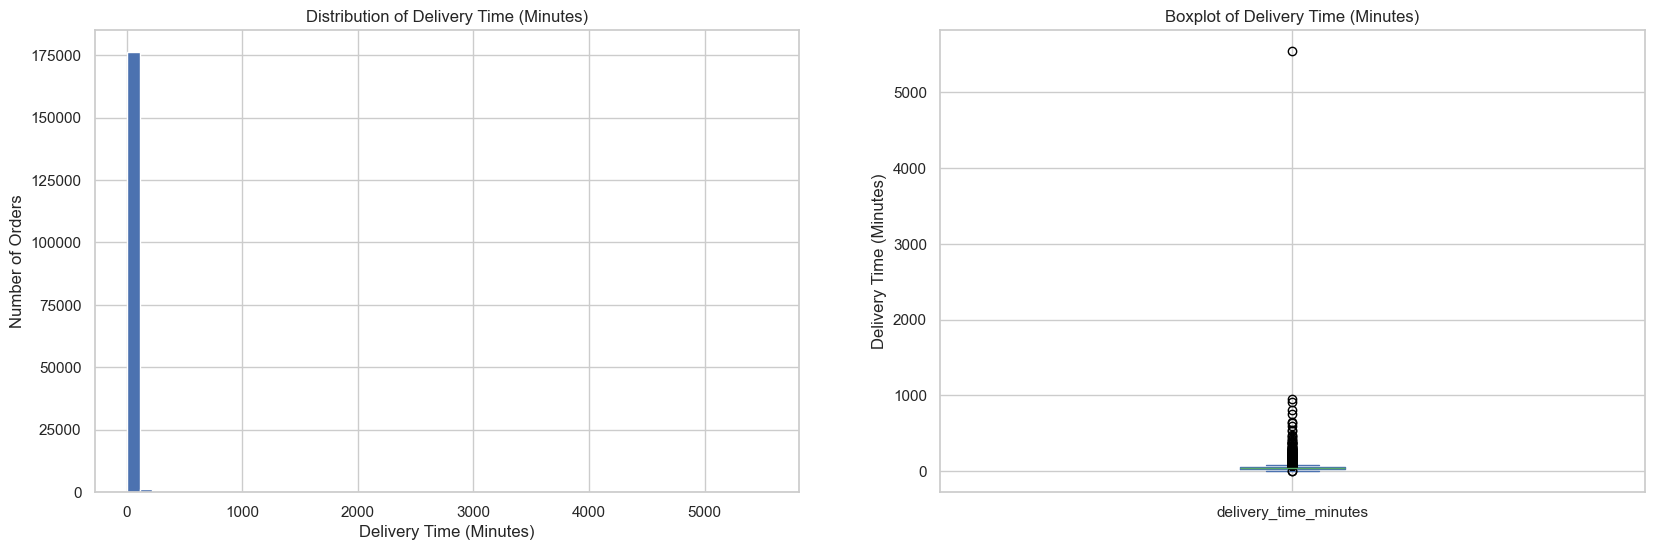

In [11]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

df["delivery_time_minutes"].hist(bins=50, ax=ax[0])
ax[0].set_title("Distribution of Delivery Time (Minutes)")
ax[0].set_xlabel("Delivery Time (Minutes)")
ax[0].set_ylabel("Number of Orders")
df["delivery_time_minutes"].plot(kind="box", ax=ax[1])
ax[1].set_title("Boxplot of Delivery Time (Minutes)")
ax[1].set_ylabel("Delivery Time (Minutes)")
plt.show()

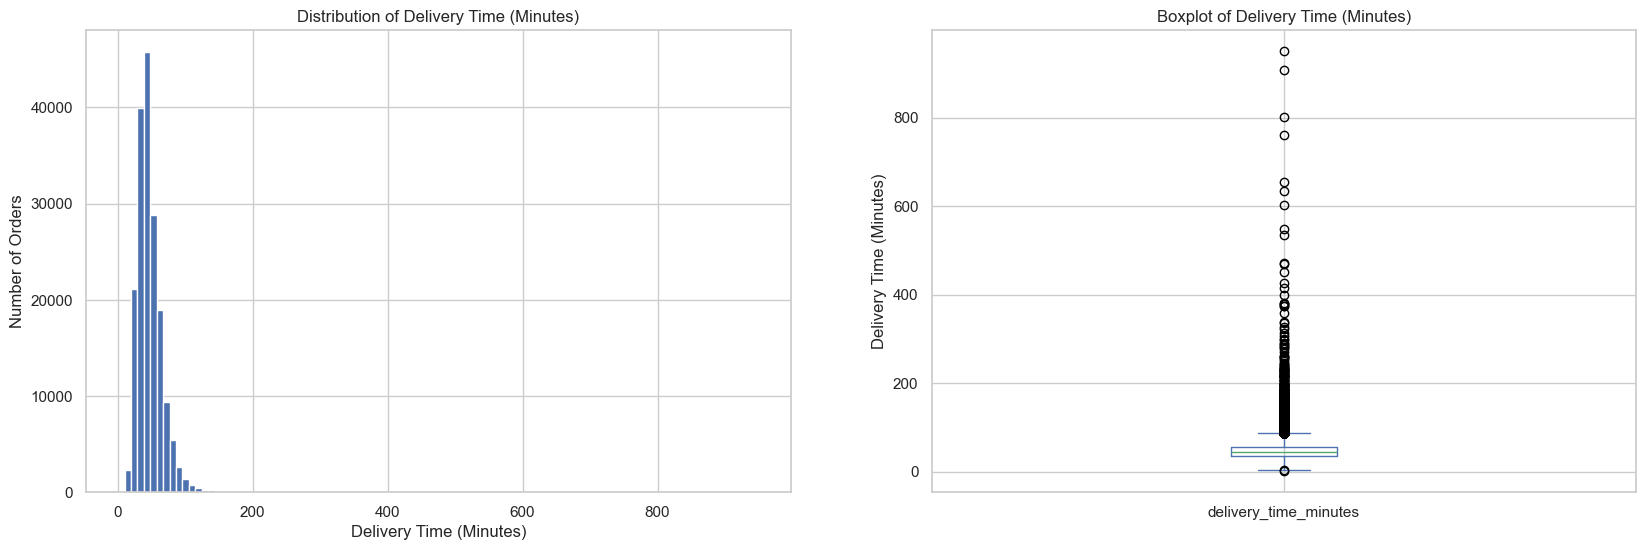

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

_=df[df["delivery_time_minutes"]<1000]

_["delivery_time_minutes"].hist(bins=100, ax=ax[0])
ax[0].set_title("Distribution of Delivery Time (Minutes)")
ax[0].set_xlabel("Delivery Time (Minutes)")
ax[0].set_ylabel("Number of Orders")
_["delivery_time_minutes"].plot(kind="box", ax=ax[1])
ax[1].set_title("Boxplot of Delivery Time (Minutes)")
ax[1].set_ylabel("Delivery Time (Minutes)")
plt.show()

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>

In [37]:
temp=df["created_at_day_of_week"].value_counts().reset_index().sort_values(by="created_at_day_of_week")
temp

,created_at_day_of_week,count
5,1,22105
6,2,21547
4,3,22796
3,4,24177
0,5,29562
1,6,29490
2,7,27867


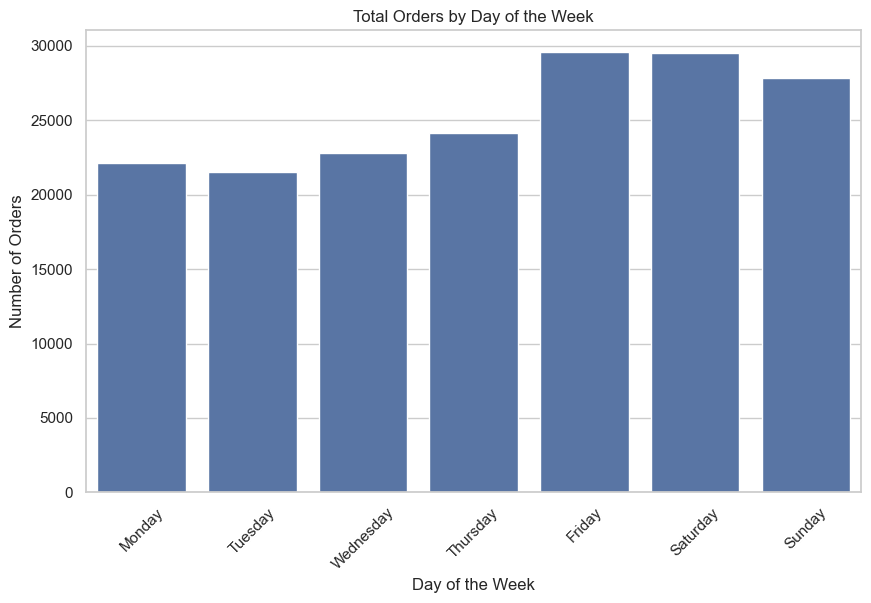

In [42]:
plt.figure(figsize=(10, 6))

sns.barplot(data=temp, x="created_at_day_of_week", y="count")
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
tick_positions = plt.xticks()[0]
plt.xticks(tick_positions, day_names, rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.title("Total Orders by Day of the Week");

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>

In [43]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_year', 'created_at_month',
       'created_at_day', 'created_at_hour', 'created_at_minute',
       'created_at_second', 'actual_delivery_time_year',
       'actual_delivery_time_month', 'actual_delivery_time_day',
       'actual_delivery_time_hour', 'actual_delivery_time_minute',
       'actual_delivery_time_second', 'created_at_month_name',
       'actual_delivery_time_month_name', 'created_at_day_of_week',
       'actual_delivery_time_day_of_week', 'created_at_day_name',
       'actual_delivery_time_day_name', 'created_at_week_number',
       'actual_delivery_time_week_number', 'created_at_week_of_month',
       'actual_delivery_time_week_of_month', 'delivery_time_seconds',

# Bivariate Analysis

In [49]:
t_df=df[(df["delivery_time_minutes"]<400) & (df["total_items"]<100) & (df["max_item_price"]<1000)]

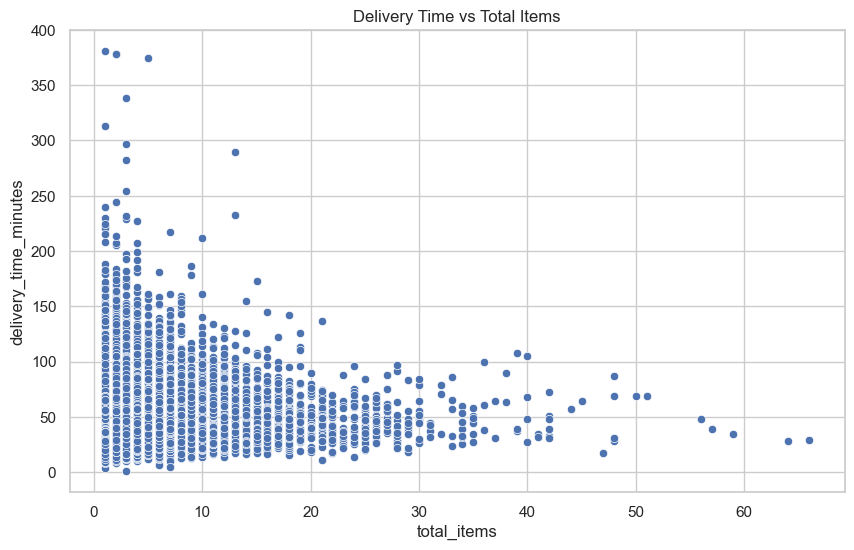

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=t_df, x='total_items', y='delivery_time_minutes');
plt.title("Delivery Time vs Total Items");

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- We can see that Total items have no effect on the delivery time

**Subtotal vs Total Items**

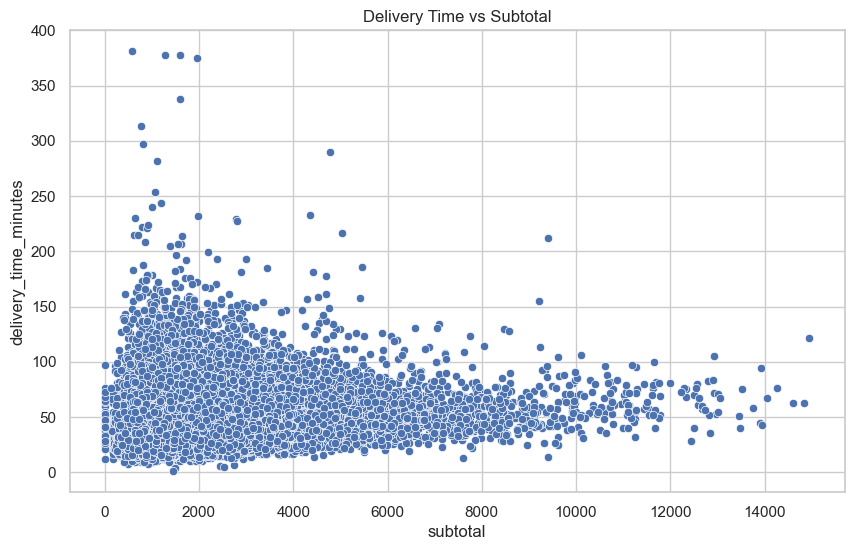

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=t_df, x='subtotal', y='delivery_time_minutes');
plt.title("Delivery Time vs Subtotal");